In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("1645792390_cep1_dataset (1).xlsx")

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Observations:
1. There are total 303 datapoints in each columns
2. Each columns has 0 null values so need of dropping filling the columns

In [5]:
df.describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

# Observations:
1. The maximum age of the patient is 77 whereas the minimum age is 29
2. 75 % of paitents are below 61 years of age
3. Target variable has only 0 and 1 entry so it is a clearly Classification task
4. Categorical variables:
            Sex, chest pain type(cp), fasting blood sugar > 120mg/dl(fbs), resting electrocardiographic results(restecg), exercise induced angina(exang), slope, ca, thal
5. Numerical variables:
            Age, trestbps, chol, thalach, oldpeak

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

# Observations:
165 paitents have cardiovascular disease whereas 138 paitent are not affected

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

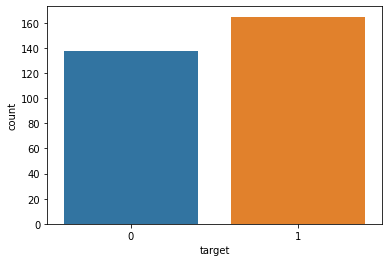

In [8]:
# Visulization of target column
sns.countplot(df["target"])

<AxesSubplot:xlabel='fbs', ylabel='count'>

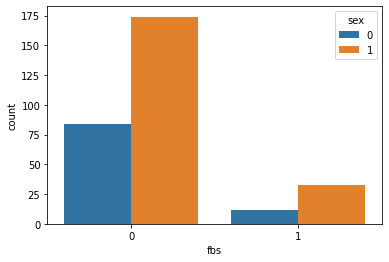

In [9]:
sns.countplot(data = df, x = "fbs", hue = "sex")

<AxesSubplot:xlabel='restecg', ylabel='count'>

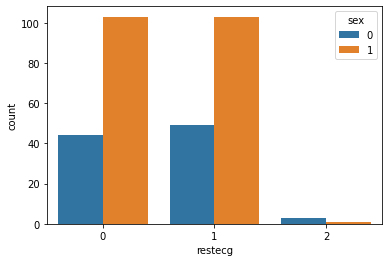

In [10]:
sns.countplot(data = df, x = "restecg", hue = "sex")

<AxesSubplot:xlabel='exang', ylabel='count'>

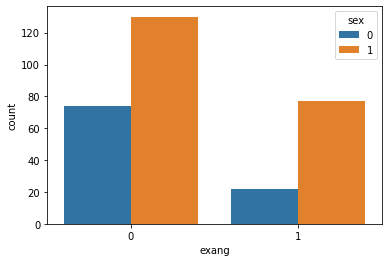

In [11]:
sns.countplot(data = df, x = "exang", hue = "sex")

<AxesSubplot:xlabel='slope', ylabel='count'>

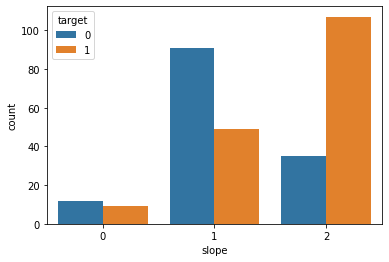

In [12]:
sns.countplot(data = df, x = "slope", hue = "target")

# Observations:
1. At slope 0 and 1 the patient are getting less heart attacks 
2. And at slope 2 heart attacks of the patients have being increased

<AxesSubplot:xlabel='ca', ylabel='count'>

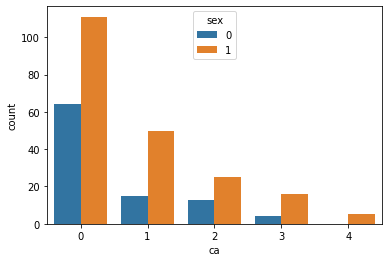

In [13]:
sns.countplot(data = df, x = "ca", hue = "sex")

In [14]:
df["thal"].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='count'>

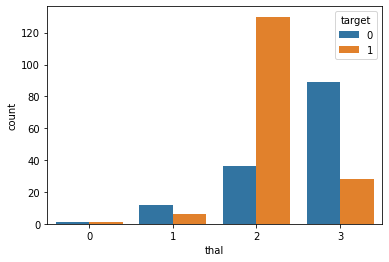

In [15]:
sns.countplot(data = df, x = "thal", hue = "target")

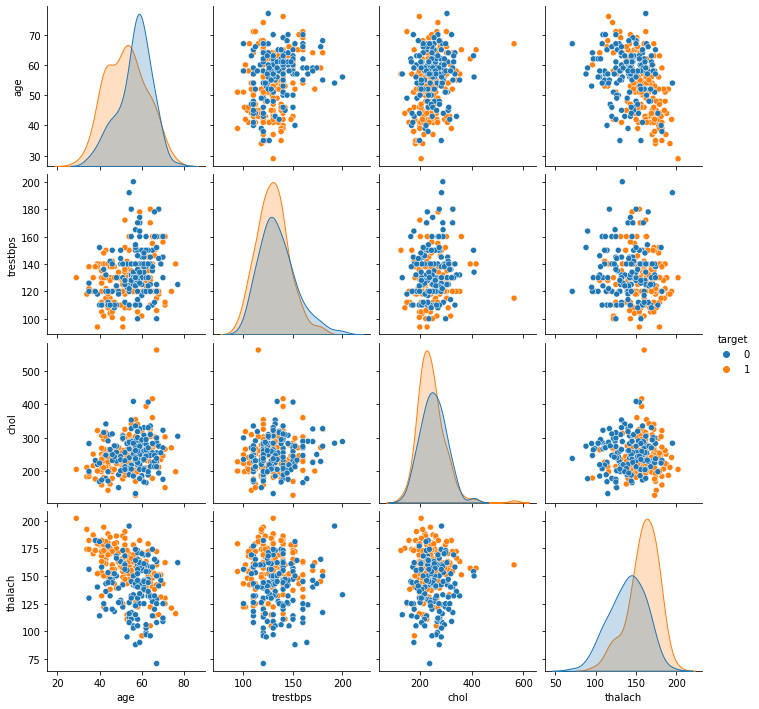

In [16]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

# Observations:
1. As the age is getting increased the maximum heart rate is getting decreased
2. Whereas the cholestrol is getting increased
3. And the resting blood pressure is not having any linear relation with the age

<AxesSubplot:xlabel='age', ylabel='count'>

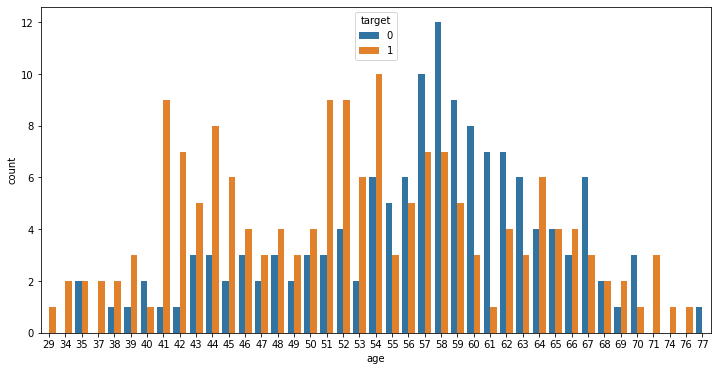

In [17]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = "age", hue = "target")

<AxesSubplot:>

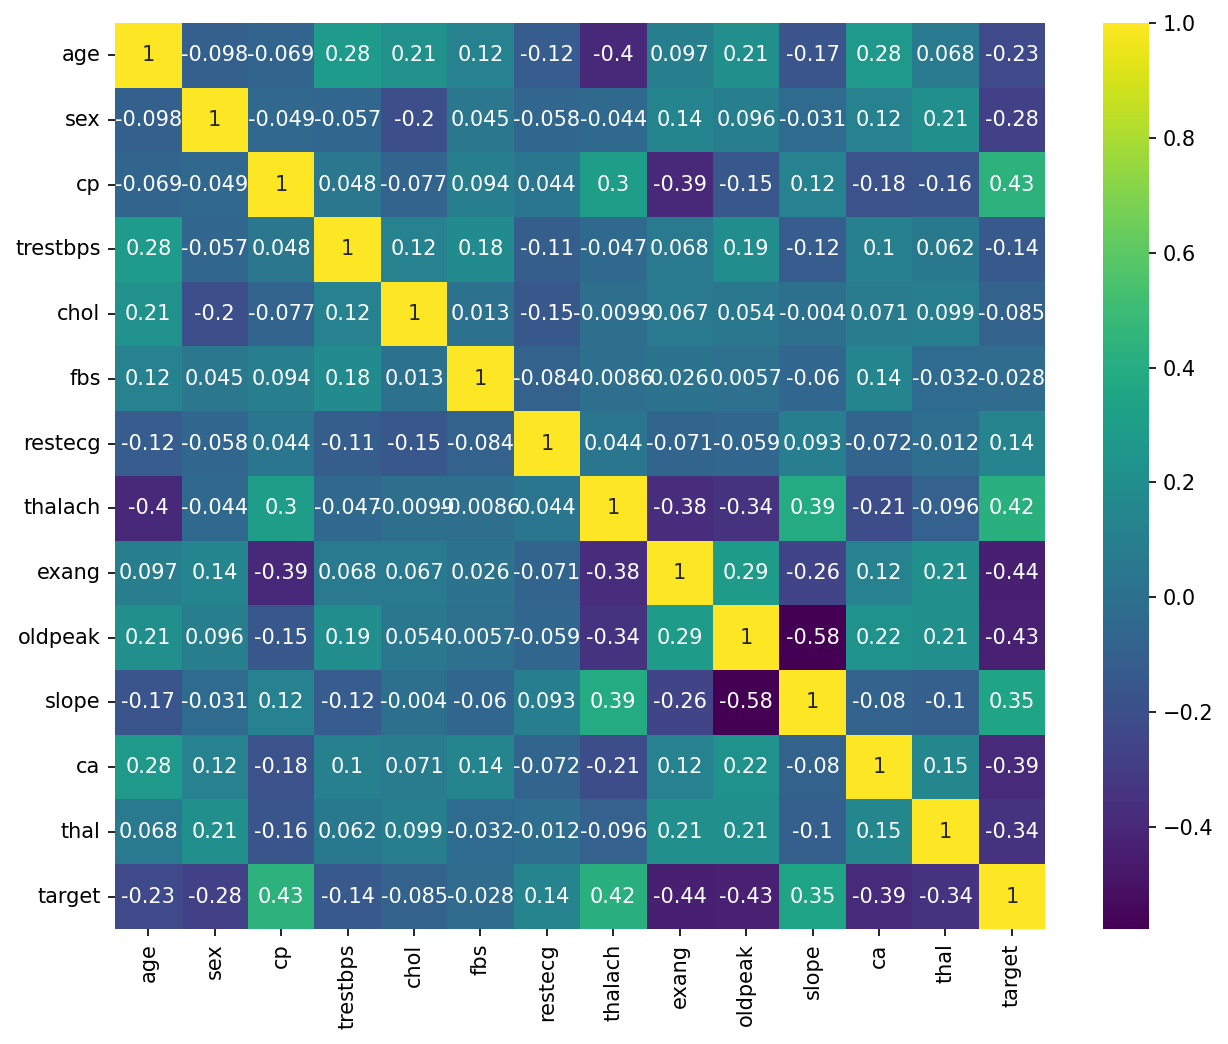

In [18]:
plt.figure(figsize = (10, 8), dpi = 150)
sns.heatmap(df.corr(), cmap = "viridis", annot = True)

# Observations:
1. It is clear from the heatmap that the serum cholestoral in mg/dl and fasting blood sugar > 120 mg/dl 
are less correlated with the target

<AxesSubplot:xlabel='slope', ylabel='count'>

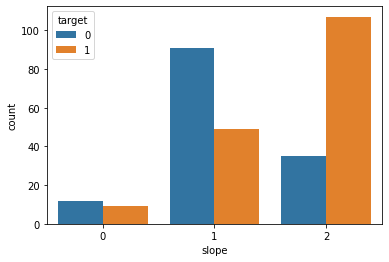

In [19]:
sns.countplot(data = df, x = "slope", hue = "target")

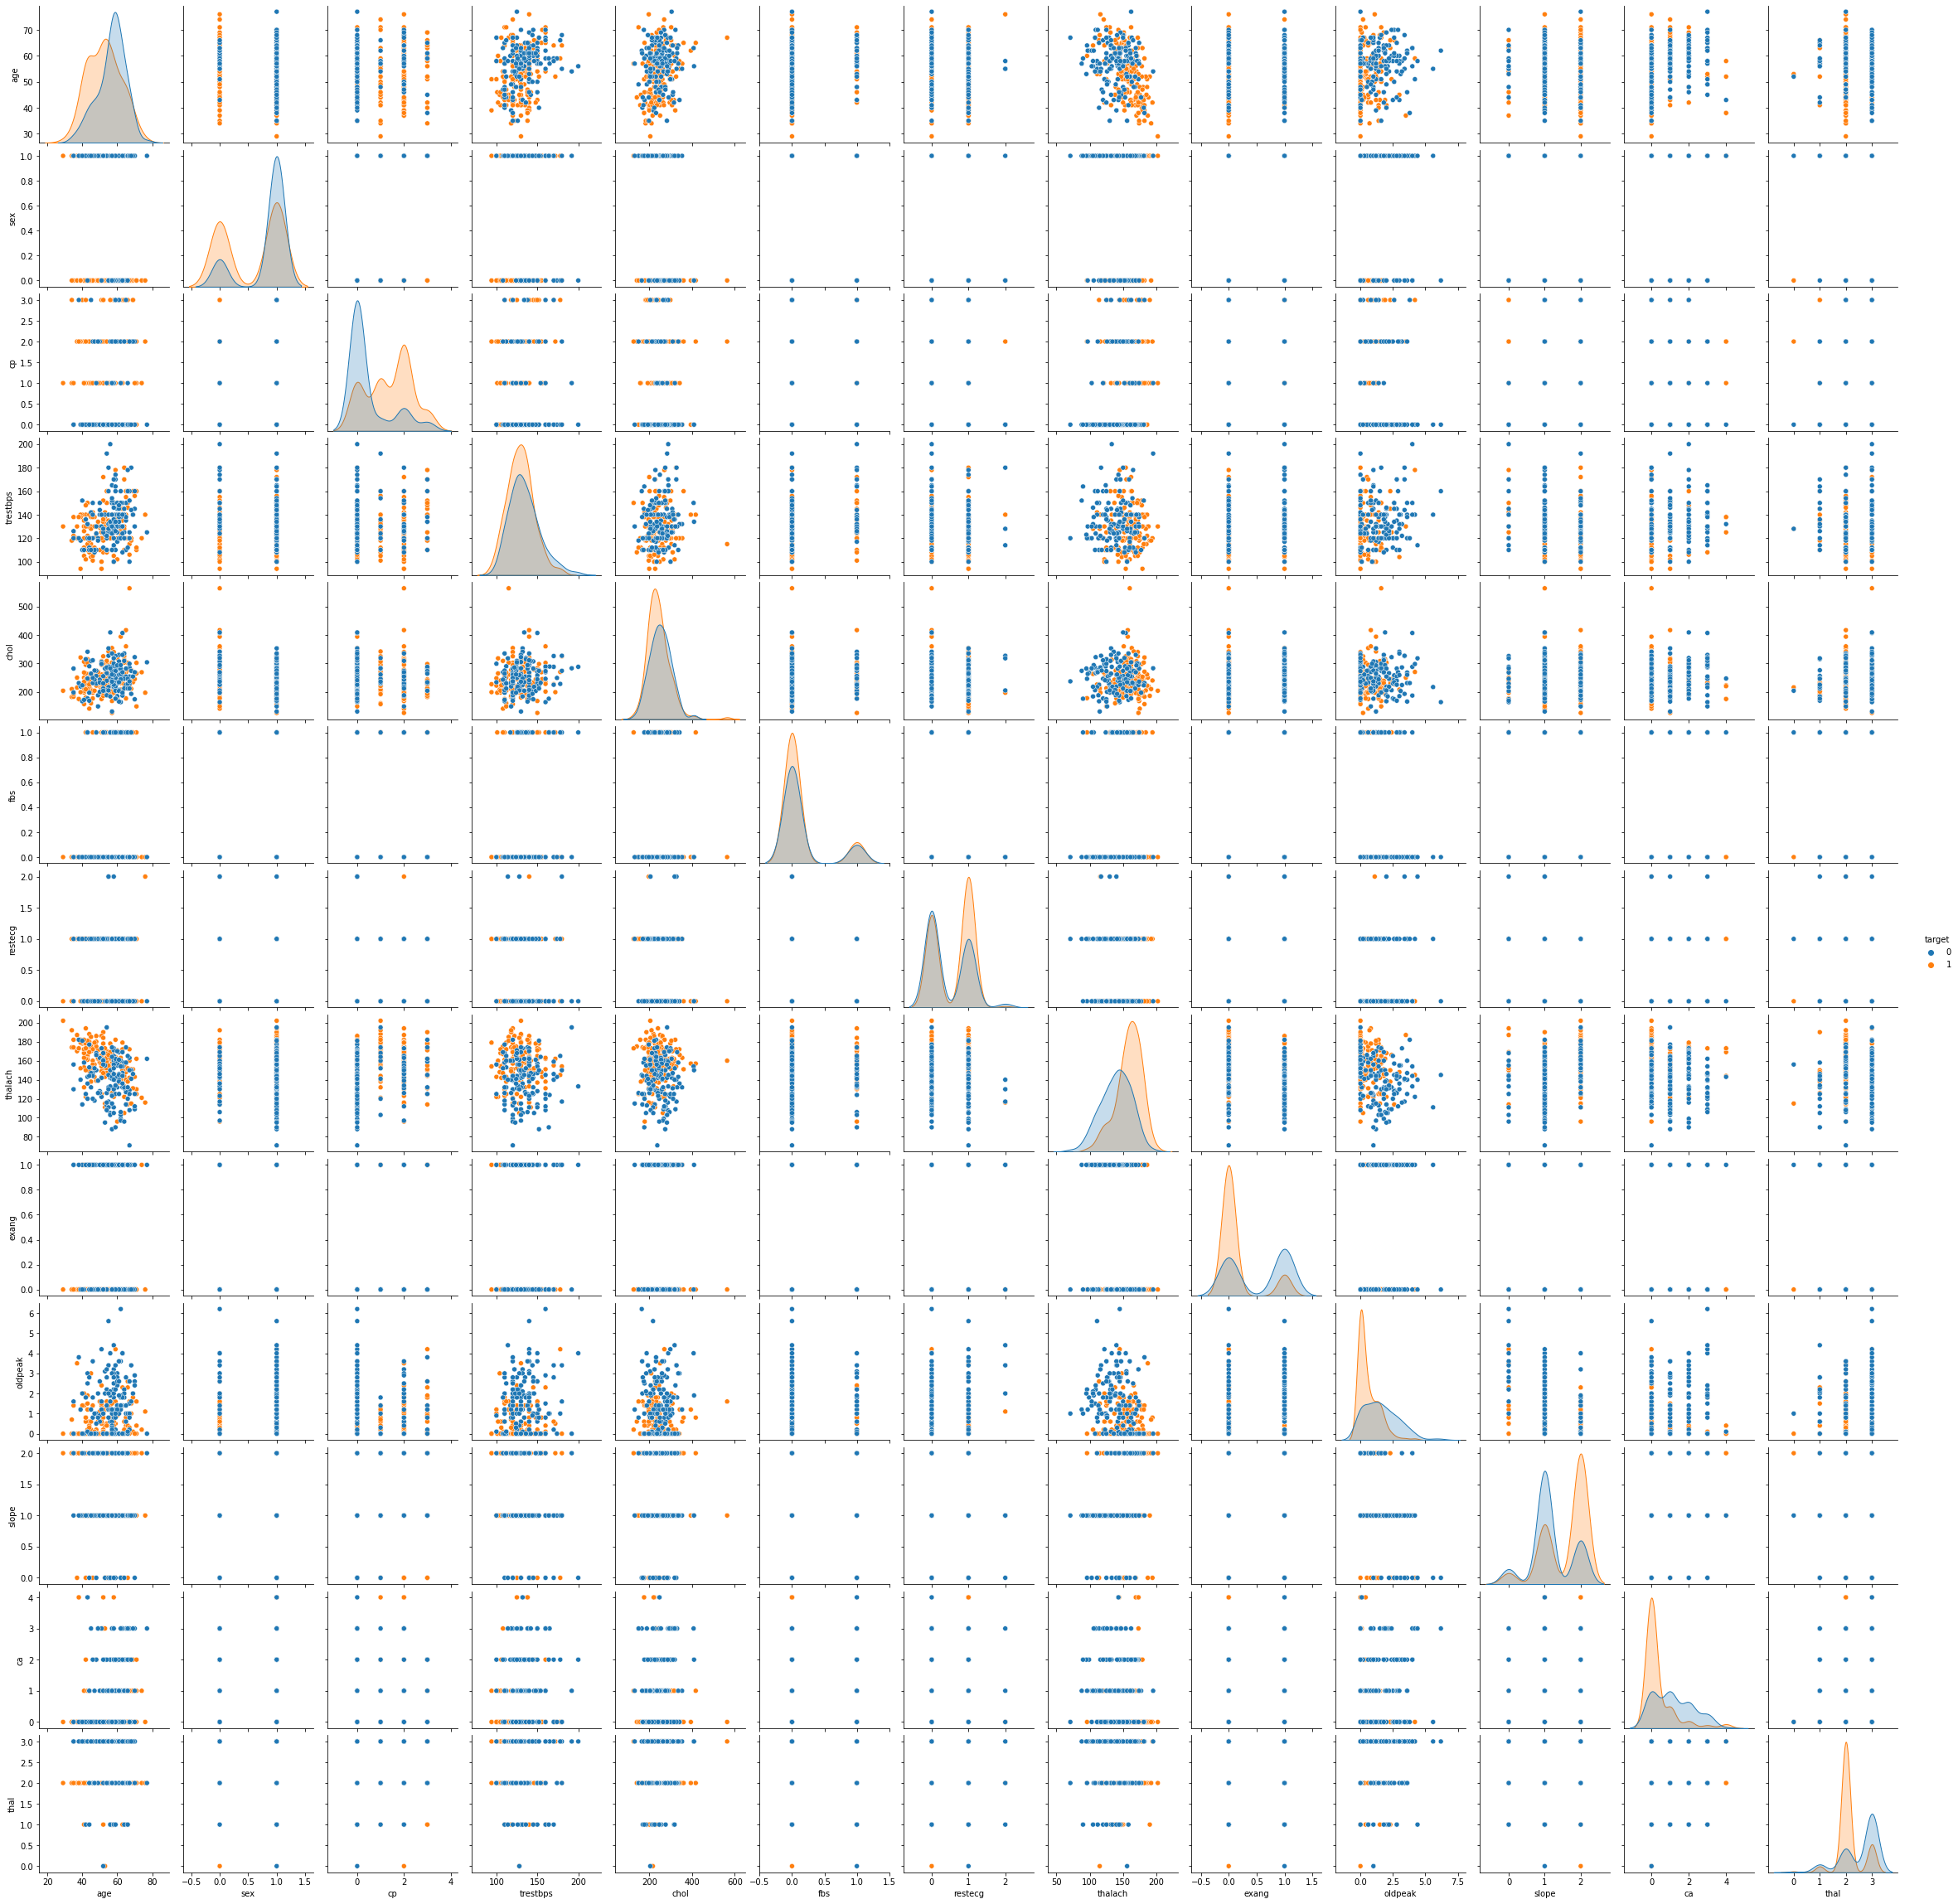

In [20]:
sns.pairplot(data = df, hue = "target")

<AxesSubplot:xlabel='age', ylabel='sex'>

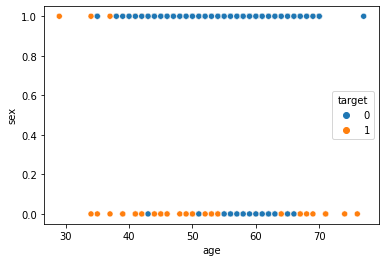

In [21]:
sns.scatterplot(data = df, x = "age", y ="sex",  hue = "target")

# Observations:
1. Male age less than 40 are only affected by heart disease whereas female age range from 55 - 65 are not affected by heart disease

In [22]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [23]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
scaler = StandardScaler()

In [25]:
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [26]:
x = df[feature_cols]
y = df.target

In [27]:
model = sm.Logit(y, sm.add_constant(x))
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Tue, 10 Jan 2023   Pseudo R-squ.:                  0.4937
Time:                        17:32:10   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.023     -0.212      0.832      -0.050       0.041
sex           -1.7582      0.469     -3.751      0.000      -2.677      -0.839
cp             0.8599      0.185      4.638      0.000       0.496       1.223
trestbps      -0.0195      0.010     -1.884      0.060      -0.040       0.001
chol          -0.0046      0.004     -1.224      0.221      -0.012       0.003
fbs            0.0349      0.529      0.066      0.947      -1.003       1.073
restecg        0.4663      0.348      1.339      0.181      -0.216       1.149
thalach        0.0232      0.010      2.219      0.026       0.003       0.044
exang         -0.9800      0.410     -2.391      0.017      -1.783      -0.177
oldpeak       -0.5403      0.214     -2.526      0.012      -0.959      -0.121
slope          0.5793      0.350      1.656      0.098      -0.106       1.265
ca            -0.7733      0.191     -4.051      0.000      -1.147      -0.399
thal          -0.9004      0.290     -3.104      0.002      -1.469      -0.332
==============================================================================
"""

In [28]:
coefs = pd.DataFrame({
    "coef":results.params.values,
    "odds ratio":np.exp(results.params.values),
    "pvalues":results.pvalues,
    "name":results.params.index
}).sort_values(by = "pvalues", ascending = True)

In [29]:
coefs

coef  odds ratio   pvalues      name
cp        0.859851    2.362808  0.000004        cp
ca       -0.773349    0.461465  0.000051        ca
sex      -1.758181    0.172358  0.000176       sex
thal     -0.900432    0.406394  0.001910      thal
oldpeak  -0.540274    0.582589  0.011523   oldpeak
exang    -0.979981    0.375318  0.016782     exang
thalach   0.023211    1.023482  0.026485   thalach
trestbps -0.019477    0.980712  0.059582  trestbps
slope     0.579288    1.784767  0.097717     slope
const     3.450472   31.515277  0.179653     const
restecg   0.466282    1.594057  0.180618   restecg
chol     -0.004630    0.995380  0.220873      chol
age      -0.004908    0.995104  0.832266       age
fbs       0.034888    1.035503  0.947464       fbs

In [30]:
feature_cols = coefs[coefs.pvalues < 0.05].index

In [31]:
feature_cols

Index(['cp', 'ca', 'sex', 'thal', 'oldpeak', 'exang', 'thalach'], dtype='object')

# Observations:
Above are the features which are having p-values less than 0.05 and thus are the useful features for logistic model

In [32]:
X = df[feature_cols]
y = df["target"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet'],
              "C" : np.linspace(0, 1, 10),
              "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "multi_class" : ['auto', 'ovr', 'multinomial'],
              "l1_ratio" : np.linspace(0, 1, 10)}

In [40]:
grid = GridSearchCV(model, param_grid, scoring = "accuracy", cv = 5, verbose = 1)

In [41]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:487: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:487: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anac

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:432: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:198: RuntimeWarning: invalid value encountered in double_scalars
  loss += 0.5 * l2_reg_strength * (weights @ weights)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:200: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ grad_per_s

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: invalid value encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplil

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:362: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = gradient.T @ X + l2

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: invalid value encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplil

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-pack

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-pack

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:362: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = gradient.T @ X + l2

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:362: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = gradient.T @ X + l2

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-pack

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:362: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = gradient.T @ X + l2

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:362: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = gradient.T @ X + l2

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:362: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = gradient.T @ X + l2

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:362: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = gradient.T @ X + l2

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:362: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = gradient.T @ X + l2

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-pack

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:362: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = gradient.T @ X + l2

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: invalid value encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: invalid value encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_re

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: invalid value encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1.0 / C) * l1_ratio
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:492: RuntimeWarning: invalid value encountered in double_scalars
  alpha = (1.0 / C) * (1 - l1_ratio)
C:\Users\prabh\anaconda3

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_linear_loss.py:362: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = gradient.T @ X + l2

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_sag.py:318: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:489: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1.0 / C
C:\Users\prabh\anaconda3\envs\Simpli

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'el

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [42]:
grid.best_params_

{'C': 0.3333333333333333,
 'l1_ratio': 0.0,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [44]:
y_pred = grid.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


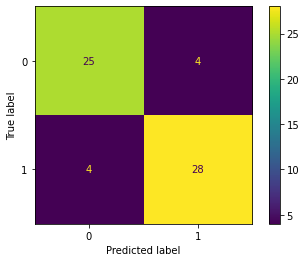

In [47]:
plot_confusion_matrix(grid, X_test, y_test)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
rfc = RandomForestClassifier()

In [51]:
n_estimators = np.arange(1, 140, 4)

In [52]:
max_features = ["sqrt", "log2"]

In [53]:
bootstrap = [True, False]

In [54]:
oob_score = [True, False]

In [55]:
param_grid = {"n_estimators" : n_estimators,
             "max_features" : max_features,
             "bootstrap" : bootstrap,
             "oob_score" : oob_score}

In [56]:
grid = GridSearchCV(rfc, param_grid)

In [57]:
grid.fit(X_train, y_train)

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101,
       105, 109, 113, 117, 121, 125, 129, 133, 137]),
                         'oob_score': [True, False]})

In [58]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 53,
 'oob_score': False}

In [59]:
rfc = RandomForestClassifier(bootstrap=True, max_features="sqrt",
                            n_estimators = 53, oob_score=False)

In [60]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=53)

In [61]:
y_pred1 = rfc.predict(X_test)

In [62]:
confusion_matrix(y_test, y_pred1)

array([[24,  5],
       [ 6, 26]], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


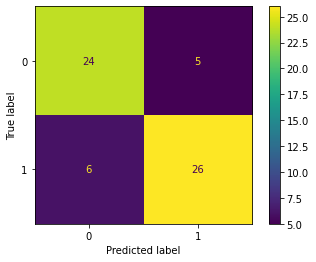

In [64]:
plot_confusion_matrix(rfc, X_test, y_test)